In [1]:
import pandas as pd
import os
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Specify the directory where your Excel files are located
excel_files_directory = './pcard-expenses/'

In [3]:
# List all Excel files in the directory
excel_files = [file for file in os.listdir(excel_files_directory) if file.endswith('.xlsx')]

In [4]:
# Create an empty dictionary to store DataFrames
dataframes = {}

# Loop through each Excel file and load data into DataFrames
for excel_file in excel_files:
    file_path = os.path.join(excel_files_directory, excel_file)
    df_name = os.path.splitext(excel_file)[0]  # Use the filename without extension as DataFrame name
    dataframes[df_name] = pd.read_excel(file_path)

In [5]:
# Create an empty list to store DataFrames
dataframes = []

# Loop through each Excel file and load data into DataFrames
for excel_file in excel_files:
    file_path = os.path.join(excel_files_directory, excel_file)
    df = pd.read_excel(file_path)
    dataframes.append(df)

In [6]:
# Combine all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

In [7]:
# Now 'df' contains the combined data from all Excel files
# You can save it as a new Excel file if needed
df.to_excel('merged_data.xlsx', index=False)

In [8]:
df = pd.read_excel('merged_data.xlsx')

In [9]:
df.shape

(220542, 16)

In [10]:
df = df.dropna()

In [11]:
df.shape

(177753, 16)

In [12]:
df.head()

,Division,Batch-Transaction-ID,Transaction Date,Card Posting Dt,Merchant Name,Transaction Amt.,Trx Currency,Original Amount,Original Currency,G/L Account,G/L Account Description,Cost Centre /WBS Element / Order,Cost Centre /WBS Element / Order Description,Merchant Type,Merchant Type Description,Purpose
0,PUBLIC HEALTH,4608-1,2017-06-15,2017-06-16,PAYPAL *OBC2012,50.00,CAD,50.00,CAD,4760,MEMBERSHIP FEES,PH3071,MATERNAL INFANT HEALTH PROGRAM SUPPORT,8641.0,"Associations - Civic, Social, and Frater",MEMBERSHIP FEE
1,PUBLIC HEALTH,4617-1,2017-06-21,2017-06-23,CHNC,423.75,CAD,423.75,CAD,4256,CONFERENCES/SEMINARS - REGISTRATION FEES,PH3071,MATERNAL INFANT HEALTH PROGRAM SUPPORT,8641.0,"Associations - Civic, Social, and Frater",CHNC CONFERENCE
2,PUBLIC HEALTH,4621-1,2017-06-26,2017-06-27,POST MD-CPD-UOFT,2601.00,CAD,2601.00,CAD,4256,CONFERENCES/SEMINARS - REGISTRATION FEES,PH3071,MATERNAL INFANT HEALTH PROGRAM SUPPORT,8220.0,"Colleges, Universities, Professional Sch",UOFT CONFERENCE
3,PUBLIC HEALTH,4626-1,2017-06-28,2017-06-29,EVENTBRITE/PERINATALMO,480.66,CAD,480.66,CAD,4256,CONFERENCES/SEMINARS - REGISTRATION FEES,PH3071,MATERNAL INFANT HEALTH PROGRAM SUPPORT,7922.0,Theatrical Producers (except Motion Pict,REGISTRATION FEES
5,ECONOMIC DEVELOPMENT & CULTURE,4590-1,2017-06-02,2017-06-05,LEE VALLEY - DOWNTOWN,38.31,CAD,38.31,CAD,2600,RECREATIONAL & EDUCATIONAL SUPPLIES,AH0073,HS-MH-EDUCATION/OUTRCH-FORT YORK,5072.0,Hardware Equipment and Supplies,LEMON RASPS


In [13]:
df.dtypes

Division                                                object
Batch-Transaction-ID                                    object
Transaction Date                                datetime64[ns]
Card Posting Dt                                 datetime64[ns]
Merchant Name                                           object
Transaction Amt.                                       float64
Trx Currency                                            object
Original Amount                                        float64
Original Currency                                       object
G/L Account                                             object
G/L Account Description                                 object
Cost Centre /WBS Element / Order                        object
Cost Centre /WBS Element / Order Description            object
Merchant Type                                          float64
Merchant Type Description                               object
Purpose                                                

In [14]:
# check for missing data
df.isnull().sum()

Division                                        0
Batch-Transaction-ID                            0
Transaction Date                                0
Card Posting Dt                                 0
Merchant Name                                   0
Transaction Amt.                                0
Trx Currency                                    0
Original Amount                                 0
Original Currency                               0
G/L Account                                     0
G/L Account Description                         0
Cost Centre /WBS Element / Order                0
Cost Centre /WBS Element / Order Description    0
Merchant Type                                   0
Merchant Type Description                       0
Purpose                                         0
dtype: int64

No missing values

In [15]:
#to remove duplicate data records
df = df.drop_duplicates()

In [16]:
df.shape

(177412, 16)

In [17]:
df2 = df.copy()

In [18]:
df3 = df.copy

In [19]:
df.describe()

,Transaction Amt.,Original Amount,Merchant Type
count,177412.000000,177412.000000,177412.000000
mean,268.835097,273.307755,5872.340214
std,773.535133,1161.170448,1393.281156
min,-16150.000000,-16150.000000,0.000000
25%,31.630000,31.570000,5200.000000
50%,84.640000,84.395000,5411.000000
75%,243.630000,242.520000,5947.000000
max,61842.370000,172272.000000,9402.000000


#### Observations:

#### Transaction Amount

- Count: There are a total of 177,412 transactions recorded in this dataset.
- Mean: The average transaction amount is approximately 268.84 CAD. 
- Standard Deviation (Std). The transaction amounts vary from the average by approximately 773.54CAD on average. This indicates that there is a considerable spread or variability in transaction amounts.
- Minimum (Min): The smallest recorded transaction amount is -16,150. This suggests that there are negative transaction amounts, which could be anomalies or refunds.
- 25th Percentile (25%): About 25% of the transactions have an amount less than or equal to 31.63. This marks the lower quartile of the data distribution.
- Median (50%): The median transaction amount is 84.64. This value represents the middle point of the dataset when arranged in ascending order.
- 75th Percentile (75%): About 75% of the transactions have an amount less than or equal to 243.63. This is the upper quartile of the data distribution.
- Maximum (Max): The largest recorded transaction amount is 61,842.37.

#### Original Amount:

The statistics for 'Original Amount' follow a pattern similar to those of 'Transaction Amount' since they represent similar values.

#### Merchant Type:

- Count: There are a total of 177,412 entries in the 'Merchant Type' column, indicating the number of transactions for which the merchant type is recorded.
- Mean: The average merchant type is approximately 5872.34.
- Standard Deviation (Std): The merchant type values vary from the average by approximately 1393.28 on average. This suggests a moderate spread of merchant type values around the mean.
- Minimum (Min): The smallest recorded merchant type value is 0.
- 25th Percentile (25%): About 25% of the merchant types have a value less than or equal to 5200. This represents the lower quartile of the distribution.
- Median (50%): The median merchant type value is 5411. This value marks the middle point of the dataset when arranged in ascending order.
- 75th Percentile (75%): About 75% of the merchant types have a value less than or equal to 5947. This is the upper quartile of the distribution.
- Maximum (Max): The largest recorded merchant type value is 9402.

These statistics provide a comprehensive overview of the distribution, central tendency, and variability of the data in each column. They help to understand the characteristics of the data and to identify potential outliers or anomalies.

### Exploratory Data Analysis

#### 1. Analysis of the categorical variables

In [20]:
# Remove spaces from the 'Category' column
df['Division'] = df['Division'].str.replace(' ', '')  # Replace ' ' with '' (empty string)

In [21]:
# Group by 'Category', calculate sum of 'Value', and count occurrences
grouped = df.groupby('Division').agg({'Transaction Amt.': 'sum', 'Division': 'count'})

In [22]:
# Group by 'Category', calculate sum of 'Value', and count occurrences
grouped = df.groupby('Division').agg({'Transaction Amt.': 'sum', 'Division': 'count'})

# Rename columns for clarity
grouped.rename(columns={'Transaction Amt.': 'Sum_Value', 'Division': 'Count_Category'}, inplace=True)

# Reset index to bring 'Category' back as a column
grouped.reset_index(inplace=True)

In [23]:
# Group by 'Category' and calculate the sum of 'Value'
grouped = df.groupby('Division', as_index=False)['Transaction Amt.'].sum()

In [24]:
# Remove spaces from the 'Category' column
df['Division'] = df['Division'].str.replace(' ', '')  # Replace ' ' with '' (empty string)

In [25]:
grouped

,Division,Transaction Amt.
0,311TORONTO,3826.44
1,ACCOUNTINGSERVICES,145958.85
2,AFFORDABLEHOUSINGOFFICE,43942.41
3,CFO,1312.01
4,CHILDREN'SSERVICES,223564.03
5,CITYCLERK'SOFFICE,263320.49
6,CITYMANAGER,1083.13
7,CITYMANAGER'SOFFICE,898.71
8,CITYPLANNING,176318.50
9,CORPORATECONTRACTS,71441.73


#### Observations

This table presents a list of divisions within an organization along with corresponding transaction amounts. Each division is associated with specific financial activities or transactions. Here's a summary of the data:

Division: Represents the distinct divisions or departments within the organization.
Transaction Amt.: Denotes the transaction amount associated with each division.
Notable observations from the data:

- The division with the highest transaction amount is "PARKS, FORESTRY & RECREATION" with an amount of approximately 18,914,055.53 CAD.
- Other significant divisions include "FLEET SERVICES" with an amount of approximately 5,428,015.61 CAD, "SHELTER, SUPPORT & HOUSING ADMINISTRATION" with an amount of approximately 2,385,365.68 CAD, and "FACILITIES MANAGEMENT DIVISION" with an amount of approximately 2,597,042.58 CAD.
- Several divisions have relatively lower transaction amounts ranging from a few hundred to tens of thousands.
- Specific divisions such as "ECONOMIC DEVELOPMENT & CULTURE," "EMPLOYMENT & SOCIAL SERVICES," "FIRE SERVICES," and "PUBLIC HEALTH" have notable transaction amounts, indicating their financial activities.
- The transaction amounts vary across divisions, suggesting differing levels of financial involvement and responsibilities.

The data provides insights into the financial activities conducted by various divisions within the organization. It highlights the distribution of transaction amounts and underscores the financial significance of specific divisions.

In [26]:
# Calculate the sum of 'column_to_sum' grouped by 'categorical_variable'
sum_by_category = df.groupby('Division')['Transaction Amt.'].sum()

# Count the occurrences of each category in 'categorical_variable'
cat_count = df['Division'].value_counts()

In [27]:
cat_count

PARKS,FORESTRY&RECREATION                   95002
ECONOMICDEVELOPMENT&CULTURE                 14466
FACILITIESMANAGEMENTDIVISON                 13017
TORONTOWATER                                11414
LEGALSERVICES                                5491
LONGTERMCAREHOMES&SERVICES                   5100
EMPLOYMENT&SOCIALSERVICES                    5073
PUBLICHEALTH                                 4798
FIRESERVICES                                 4233
SOLIDWASTEMANAGEMENT                         3125
SHELTER,SUPPORT&HOUSINGADMINISTRATION        2809
FLEETSERVICES                                1972
TORONTOPARAMEDICSERVICES                     1966
TRANSPORTATIONSERVICES                       1368
ENGINEERING&CONSTRUCTIONSERVICES             1290
MUNICIPALLICENSING&STANDARDS                  889
ENVIRONMENT&ENERGYOFFICE                      668
CITYCLERK'SOFFICE                             570
CITYPLANNING                                  345
CORPORATECONTRACTS                            330


#### Observations

The data includes a range of categories, each representing a specific department, service, or area of focus within an organization. The counts associated with each category denote the frequency or occurrence of activities, transactions, or tasks related to that particular category.

Notable findings from the data are as follows:

- The category with the highest count is "PARKS, FORESTRY & RECREATION" with a count of 95,002.
- Other significant categories include "ECONOMIC DEVELOPMENT & CULTURE" with 14,466, "FACILITIES MANAGEMENT DIVISION" with 13,017, and "TORONTO WATER" with 11,414.
- Several categories have relatively lower counts, ranging from a few to several hundreds.
- Some categories appear to represent administrative functions, such as "LEGAL SERVICES," "HUMAN RESOURCES," and "FINANCIAL PLANNING."
- Certain categories are specific to emergency services, such as "FIRE SERVICES" and "EMERGENCY MEDICAL SERVICES."
- There are categories that relate to housing, social support, and public health services, such as "LONG TERM CARE HOMES & SERVICES," "SHELTER, SUPPORT & HOUSING ADMINISTRATION," and "PUBLIC HEALTH."

This data provides an overview of the distribution of activities across diverse categories within the organization, shedding light on the scope and scale of each department's involvement and responsibilities.

In [28]:
# Set the threshold count value
threshold_count = 1000

# Select categories where the count is greater than the threshold
selected_categories = cat_count[cat_count > threshold_count]

# Sort selected_categories in descending order of count
selected_categories = selected_categories.sort_values(ascending=False)

In [29]:
selected_categories

PARKS,FORESTRY&RECREATION                95002
ECONOMICDEVELOPMENT&CULTURE              14466
FACILITIESMANAGEMENTDIVISON              13017
TORONTOWATER                             11414
LEGALSERVICES                             5491
LONGTERMCAREHOMES&SERVICES                5100
EMPLOYMENT&SOCIALSERVICES                 5073
PUBLICHEALTH                              4798
FIRESERVICES                              4233
SOLIDWASTEMANAGEMENT                      3125
SHELTER,SUPPORT&HOUSINGADMINISTRATION     2809
FLEETSERVICES                             1972
TORONTOPARAMEDICSERVICES                  1966
TRANSPORTATIONSERVICES                    1368
ENGINEERING&CONSTRUCTIONSERVICES          1290
Name: Division, dtype: int64

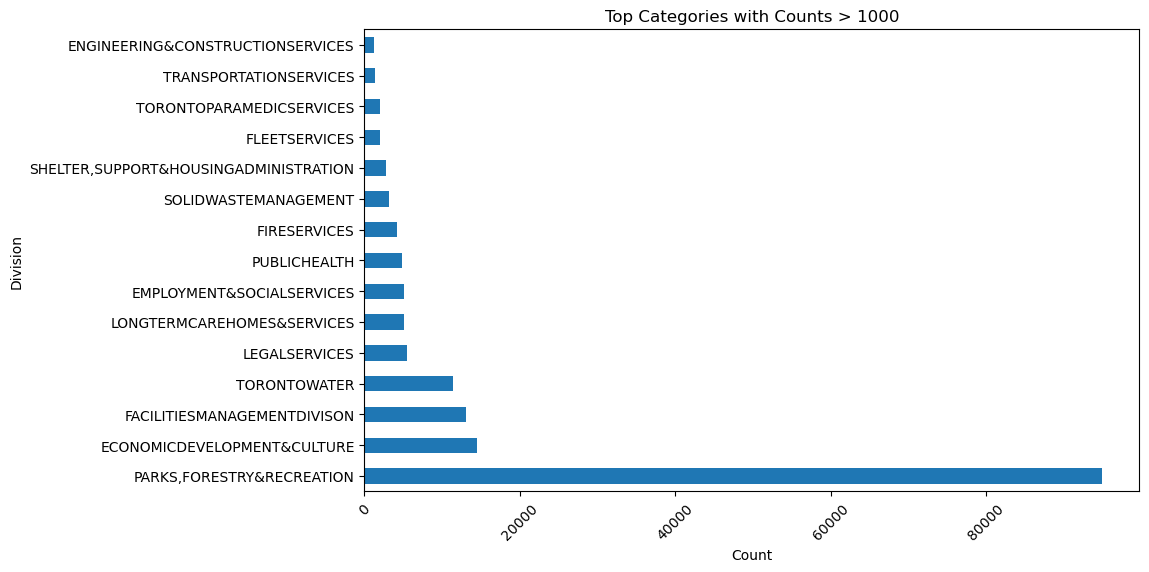

In [30]:
# Create a bar plot for the selected categories
plt.figure(figsize=(10, 6))
selected_categories.plot(kind='barh')
plt.title('Top Categories with Counts > 1000')
plt.xlabel('Count')
plt.ylabel('Division')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Set the threshold count value
threshold_count = 100000

# Select categories where the count is greater than the threshold
selected_categories = sum_by_category[sum_by_category > threshold_count]

# Sort selected_categories in descending order of count
selected_categories = selected_categories.sort_values(ascending=False)

In [32]:
selected_categories

Division
PARKS,FORESTRY&RECREATION                   18914055.53
FLEETSERVICES                                5428015.61
ECONOMICDEVELOPMENT&CULTURE                  5264799.69
FACILITIESMANAGEMENTDIVISON                  2597042.58
SHELTER,SUPPORT&HOUSINGADMINISTRATION        2385365.68
TORONTOWATER                                 2317331.82
LONGTERMCAREHOMES&SERVICES                   2013177.26
PUBLICHEALTH                                 1853035.67
FIRESERVICES                                 1247269.01
EMPLOYMENT&SOCIALSERVICES                    1161722.69
SOLIDWASTEMANAGEMENT                          640992.28
TORONTOPARAMEDICSERVICES                      580224.43
LEGALSERVICES                                 532055.64
ENVIRONMENT&ENERGYOFFICE                      300172.16
TRANSPORTATIONSERVICES                        288111.20
CITYCLERK'SOFFICE                             263320.49
CHILDREN'SSERVICES                            223564.03
CITYPLANNING                           

In [33]:
# Calculate percentiles
percentile_50 = grouped['Transaction Amt.'].quantile(0.50)
percentile_75 = grouped['Transaction Amt.'].quantile(0.75)

In [34]:
# Create a function to apply color coding based on percentiles
def color_format(val):
    if val < percentile_50:
        color = 'red'
    elif val < percentile_75:
        color = 'yellow'
    else:
        color = 'green'
    return f'background-color: {color}'

In [35]:
# Apply the formatting function to the 'Value' column
grouped_styled = grouped.style.applymap(color_format, subset=['Transaction Amt.'])

In [36]:
# Render the styled DataFrame
styled_html = grouped_styled.render()

C:\Users\Hp 2022\AppData\Local\Temp\ipykernel_33388\3366663128.py:2: FutureWarning: this method is deprecated in favour of `Styler.to_html()`
  styled_html = grouped_styled.render()


In [37]:
display(HTML(styled_html))

,Division,Transaction Amt.
0,311TORONTO,3826.440000
1,ACCOUNTINGSERVICES,145958.850000
2,AFFORDABLEHOUSINGOFFICE,43942.410000
3,CFO,1312.010000
4,CHILDREN'SSERVICES,223564.030000
5,CITYCLERK'SOFFICE,263320.490000
6,CITYMANAGER,1083.130000
7,CITYMANAGER'SOFFICE,898.710000
8,CITYPLANNING,176318.500000
9,CORPORATECONTRACTS,71441.730000


#### Color Coding Interpretation:
In order to facilitate easy interpretation, we have applied color coding to the transaction amounts:

- Green: Transaction amounts exceeding the 75th percentile.
- Yellow: Transaction amounts between the 50th and 75th percentiles.
- Red: Transaction amounts below the 50th percentile.

#### Key Insights:

- Notably, the division "PARKS,FORESTRY&RECREATION" demonstrates the highest transaction amount of $18,914,055.53.

- Other significant divisions include "EMPLOYMENT & SOCIALSERVICES" with $1,161,722.69 and "ECONOMICDEVELOPMENT&CULTURE" with 5,264,799.69.

- Some divisions, such as "ENVIRONMENT&ENERGY," "INTERNALAUDIT," and "EXECUTIVEMANAGEMENT," have comparatively lower transaction amounts.

### Analysis if GL Account by Transaction Value

In [38]:
# Group by "G/L Account" and calculate the sum of "Transaction Amount"
grouped_df = df.groupby('G/L Account Description')['Transaction Amt.'].sum()

# Sort the grouped data in descending order and select the top 20
top_10_accounts = grouped_df.sort_values(ascending=False).head(20)

# Print the top 10 G/L Accounts and their corresponding sums
print(top_10_accounts)

G/L Account Description
PERMIT & LICENSE FEES                       5863637.71
BLDG REPAIRS & RENOVATION SUPPLIES          3624234.68
RECREATIONAL & EDUCATIONAL SUPPLIES         3564992.24
PARTS - MACHINERY & EQUIPMENT               1930182.26
MISCELLANEOUS MATERIALS & SUPPLIES          1791049.40
GENERAL HARDWARE                            1747883.82
FOOD & NON-ALCOHOLIC BEVERAGES              1723078.59
TRAINING & DEVELOPMENT - EXTERNAL           1542462.44
TICKETS AND ADMISSION FEES                  1391707.56
ELECTRICAL SUPPLIES                         1110050.54
PLUMBING SUPPLIES                            929208.17
ADVERTISING & PROMOTION                      859597.54
CONFERENCES/SEMINARS - REGISTRATION FEES     796168.88
OTHER EXPENSES                               735644.81
M & E - HAND TOOLS                           725019.94
MOTEL/HOTEL RENT CHG                         687132.22
AGRICULTURE & BOTANICAL SUPPLIES             672079.60
GENERAL EQUIPMENT                        

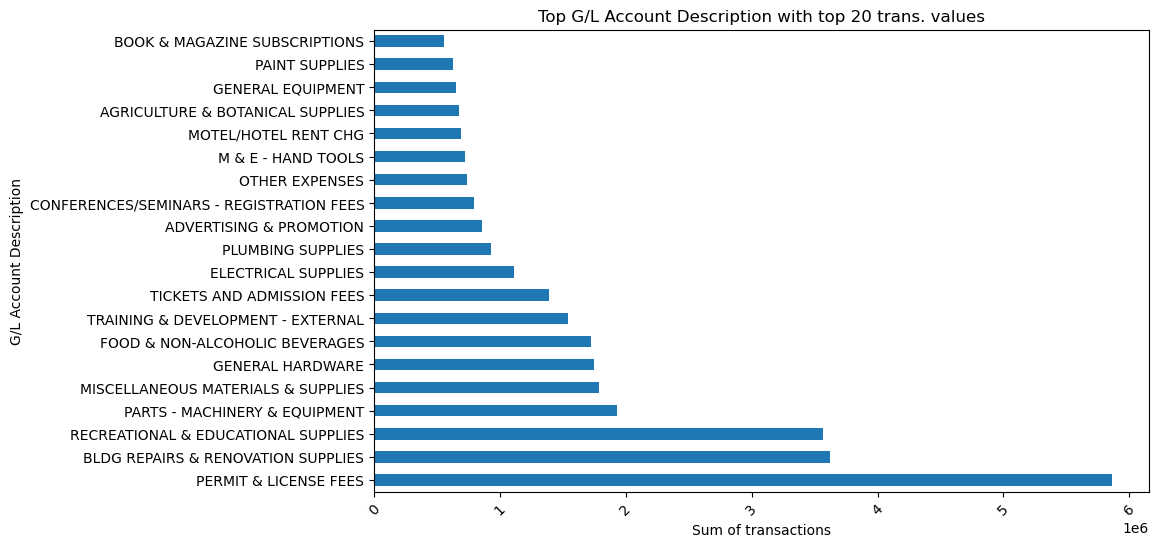

In [39]:
# Create a bar plot for the selected categories
plt.figure(figsize=(10, 6))
top_10_accounts.plot(kind='barh')
plt.title('Top G/L Account Description with top 20 trans. values')
plt.xlabel('Sum of transactions')
plt.ylabel('G/L Account Description')
plt.xticks(rotation=45)
plt.show()

#### Observation

The above table gives the top 20 GL Accounts by their sums of transaction values.

- G/L Account Description: Represents descriptions of different G/L (General Ledger) accounts, which likely correspond to different types of expenses or financial activities.
- Trans_sum: Denotes the sum of transaction amounts associated with each G/L account description.
- G/L Account: Represents the specific G/L account identifiers.

Notable observations from the data:

- The G/L account description with the highest sum of transaction amounts is "PERMIT & LICENSE FEES" with a total sum of 5,863,637.71 CAD.
- Other significant G/L account descriptions include "BLDG REPAIRS & RENOVATION SUPPLIES" with a sum of 3,624,234.68 CAD, "RECREATIONAL & EDUCATIONAL SUPPLIES" with a sum of 3,564,992.24 CAD, and "PARTS - MACHINERY & EQUIPMENT" with a sum of 1,930,182.26 CAD.
- The dataset includes various categories of expenses, supplies, fees, and services, each with its corresponding sum of transaction amounts.

Overall, the data provides insights into the distribution of transaction sums across different G/L account descriptions, offering a glimpse into the organization's financial activities and expenditures.

### Analysis if GL Account by Volume of trasactions

In [40]:
# Group by "G/L Account" and calculate the sum of "Transaction Volume"
grouped_data = df.groupby('G/L Account Description')['Transaction Amt.'].count()

# Get the top 20 G/L Accounts along with their corresponding sums
top_20_accounts = grouped_data.nlargest(20)

# Print the results
print(top_20_accounts)

G/L Account Description
RECREATIONAL & EDUCATIONAL SUPPLIES    26193
FOOD & NON-ALCOHOLIC BEVERAGES         22825
BLDG REPAIRS & RENOVATION SUPPLIES     15935
GENERAL HARDWARE                       10858
PARTS - MACHINERY & EQUIPMENT           7274
MISCELLANEOUS MATERIALS & SUPPLIES      6641
ONLINE SERVICES FEES                    3962
TICKETS AND ADMISSION FEES              3864
PERMIT & LICENSE FEES                   3571
PLUMBING SUPPLIES                       3555
ELECTRICAL SUPPLIES                     3376
PAINT SUPPLIES                          2932
M & E - HAND TOOLS                      2625
ADVERTISING & PROMOTION                 2564
PARKING EXPENSES (INTOWN)               2501
OTHER EXPENSES                          2392
TRAINING & DEVELOPMENT - EXTERNAL       2370
STATIONERY AND OFFICE SUPPLIES          2249
AGRICULTURE & BOTANICAL SUPPLIES        2187
BUSINESS MEETING EXPENSES               2100
Name: Transaction Amt., dtype: int64


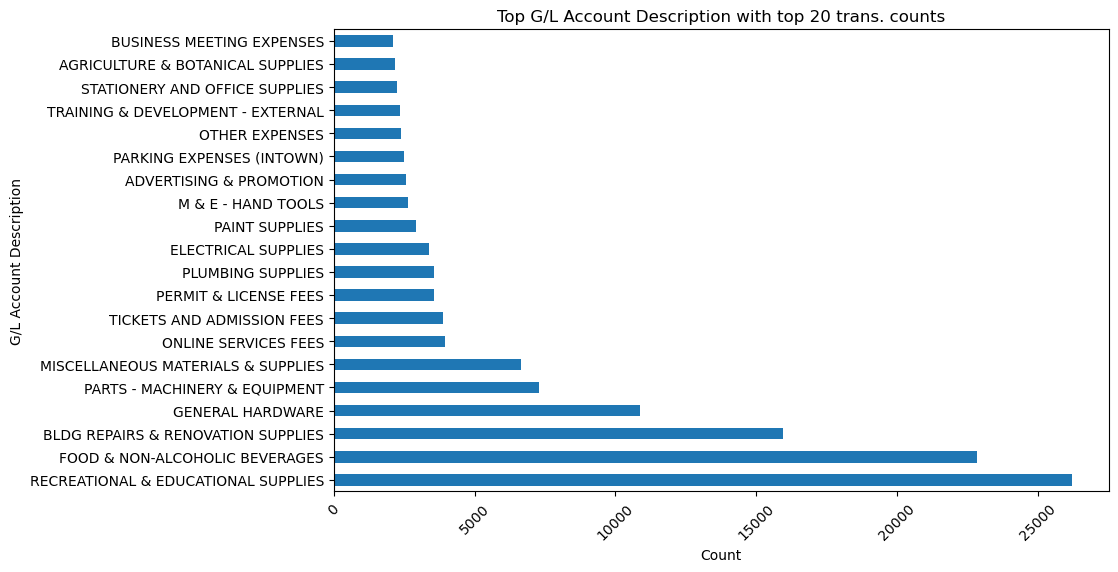

In [41]:
# Create a bar plot for the selected categories
plt.figure(figsize=(10, 6))
top_20_accounts.plot(kind='barh')
plt.title('Top G/L Account Description with top 20 trans. counts')
plt.xlabel('Count')
plt.ylabel('G/L Account Description')
plt.xticks(rotation=45)
plt.show()

#### Observations:

The above give a table with "G/L Account Description" and corresponding counts of top 20 accounts by transaction values. 

- G/L Account Description: Represents descriptions of different general ledger (G/L) accounts.
- Count: Denotes the count associated with each G/L account description.
- Notable observations from the data:

- The G/L Account Description with the highest count is "RECREATIONAL & EDUCATIONAL SUPPLIES" with a count of 26,193.
- Other significant G/L Account Descriptions include "FOOD & NON-ALCOHOLIC BEVERAGES" with 22,825, "BLDG REPAIRS & RENOVATION SUPPLIES" with 15,935, and "GENERAL HARDWARE" with 10,858.
- Several G/L Account Descriptions have relatively lower counts, ranging from a few hundred to a few thousand.
- The counts provide insights into the frequency or occurrence of transactions related to specific G/L Account Descriptions.


The data illustrates the distribution of counts across various G/L Account Descriptions. It highlights the significance of specific account descriptions and allows for a comparison of their occurrence rates.

### Analysis of volume of transactions by Cost Center 

In [42]:
# Group by "Cost Centre /WBS Element / Order Description" and calculate the count of "Transaction Volume"
grouped_data = df.groupby('Cost Centre /WBS Element / Order Description')['Transaction Amt.'].count()

# Get the top 20 G/L Accounts along with their corresponding sums
top_20_cost_centers = grouped_data.nlargest(20)

# Print the results
print(top_20_cost_centers)

Cost Centre /WBS Element / Order Description
BLDG REPAIRS & RENOVATIONS - VARIOUS LOCATIONS        10261
SOUTH-GENERAL-SPECIALIZED MAINT                        2449
WTR TREAT & SUPPLY: TRANSMISSION - WEST                2089
MECHANICAL MAINT-VEHICLE MAINT                         1784
VEHICLE LICENSING                                      1674
SOUTH GENERAL-PKS TECH SERV-TRADES                     1571
TECH SERV. 3-PARKS CONSTRUCTION                        1357
ECS ESS LAND & PROPERTY SURVEYS                        1309
SM. BUSINESS SUPPORT & ADVISORY SERVICE                1263
MULTIPLE COST CENTRES, WBS ELEMENTS OR WORK ORDERS     1194
ALNESS YD-TRADES                                       1168
OPS SUPPORT: COMPLEX SYSTEMS                           1152
E-SOUTH2-TURF&HORT                                     1107
PRN - CENTRALIZED PARKS CONSTRUCTION OPS               1012
WTR TREAT & SUPPLY: TRANSMISSION - EAST                 993
DON VALLEY-OPERATIONS                                  

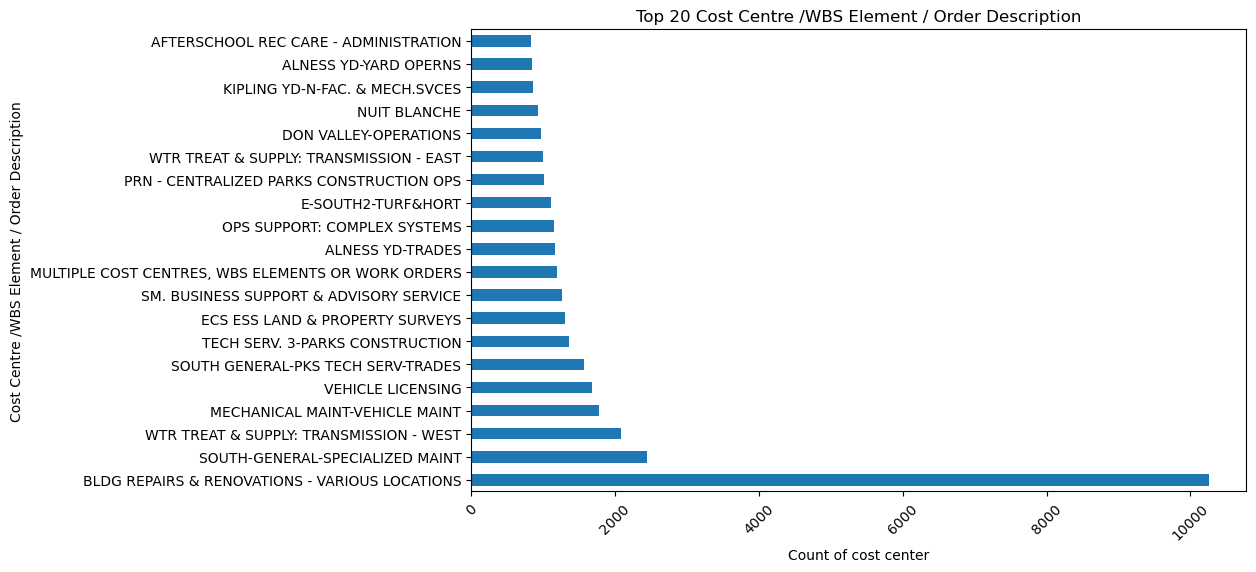

In [43]:
# Create a bar plot for the selected categories
plt.figure(figsize=(10, 6))
top_20_cost_centers.plot(kind='barh')
plt.title('Top 20 Cost Centre /WBS Element / Order Description')
plt.xlabel('Count of cost center')
plt.ylabel('Cost Centre /WBS Element / Order Description')
plt.xticks(rotation=45)
plt.show()

### Observations:

The above table and chart consist of "Cost Centre / WBS Element / Order Description" and corresponding transaction counts. 

Here's a summary of the data:

- Cost Centre / WBS Element / Order Description: Represents different cost centers, work breakdown structure (WBS) elements, or order descriptions.
- Transaction Count: Denotes the count of transactions associated with each cost center, WBS element, or order description.

Key points from the data:

- The entry with the highest transaction count is related to "BLDG REPAIRS & RENOVATIONS - VARIOUS LOCATIONS" with 10,261 transactions.
- Other notable entries include "SOUTH-GENERAL-SPECIALIZED MAINT" with 2,449 transactions, "WTR TREAT & SUPPLY: TRANSMISSION - WEST" with 2,089 transactions, and "MECHANICAL MAINT-VEHICLE MAINT" with 1,784 transactions.
- Multiple entries have transaction counts ranging from hundreds to over a thousand.
- Each entry corresponds to a specific cost center, WBS element, or order description, indicating the distribution of transaction counts across different areas of focus.


The data provides insights into the transaction activity across various cost centers, WBS elements, or order descriptions. It highlights the significance of specific areas and allows for comparison based on transaction volumes.

### Analysis of transaction values by Cost Center

In [44]:
# Group by "Cost Centre /WBS Element / Order Description" and calculate the count of "Transaction Volume"
grouped_data = df.groupby('Cost Centre /WBS Element / Order Description')['Transaction Amt.'].sum()

# Get the top 20 G/L Accounts along with their corresponding sums
top_20_cost_centers = grouped_data.nlargest(20)

# Print the results
print(top_20_cost_centers)

Cost Centre /WBS Element / Order Description
VEHICLE LICENSING                                     5262320.86
BLDG REPAIRS & RENOVATIONS - VARIOUS LOCATIONS        2021572.39
SOUTH-GENERAL-SPECIALIZED MAINT                        861312.72
SOUTH GENERAL-PKS TECH SERV-TRADES                     625424.24
NUIT BLANCHE                                           468220.94
MULTIPLE COST CENTRES, WBS ELEMENTS OR WORK ORDERS     460181.10
SM. BUSINESS SUPPORT & ADVISORY SERVICE                423147.86
PRN - CENTRALIZED PARKS CONSTRUCTION OPS               391318.94
OPS SUPPORT: COMPLEX SYSTEMS                           389250.75
IM-FILM COMMISSIONER'S OFFICE                          356103.76
KIPLING YD-PARKS CONSTR                                351928.52
HOSTEL SERVICES HEAD OFFICE                            350372.91
WTR TREAT & SUPPLY: TRANSMISSION - WEST                334885.19
MECHANICAL MAINT-VEHICLE MAINT                         324966.31
KIPLING YD-N-FAC. & MECH.SVCES               

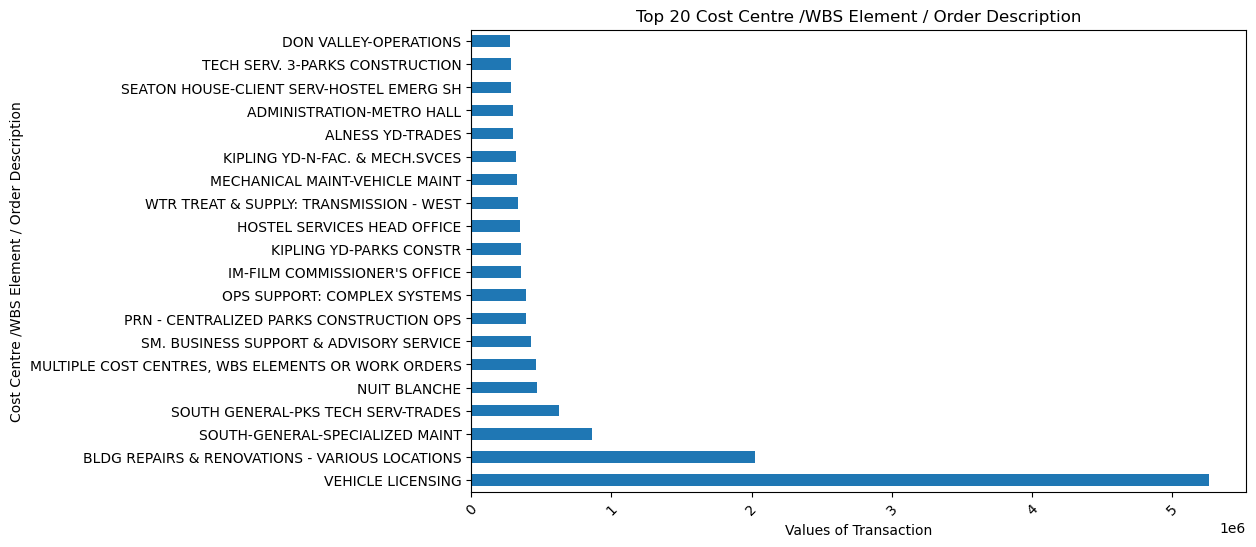

In [45]:
# Create a bar plot for the selected categories
plt.figure(figsize=(10, 6))
top_20_cost_centers.plot(kind='barh')
plt.title('Top 20 Cost Centre /WBS Element / Order Description')
plt.xlabel('Values of Transaction')
plt.ylabel('Cost Centre /WBS Element / Order Description')
plt.xticks(rotation=45)
plt.show()

In [46]:
# Group by "Cost Centre /WBS Element / Order Description" and calculate the count of "Transaction Volume"
grouped_data = df.groupby('Merchant Type Description')['Transaction Amt.'].count()

# Get the top 20 G/L Accounts along with their corresponding sums
top_20_merchant_descr = grouped_data.nlargest(20)

# Print the results
print(top_20_merchant_descr)

Merchant Type Description
Grocery Stores, Supermarkets                28219
Home Supply Warehouse                       26222
Industrial Supplies Not Elsewhere Classi     8035
Hardware Stores                              6171
Discount Stores                              6047
Government Services - Not Elsewhere Clas     5564
Fines                                        5104
Office, School Supply, and Stationery St     3610
Lawn and Garden Supply Stores                3142
Automobile Parking Lots and Garages          2670
Electrical Parts and Equipment               2445
Business Services - Not Elsewhere Classi     2365
Sporting Goods Stores                        2137
Wholesale Clubs                              2064
Game, Toy, and Hobby Shops                   2024
Computer Network/Information Services        2018
Electronic Sales                             1950
Miscellaneous and Specialty Retail Store     1884
Advertising Services                         1821
Automotive Parts, Access

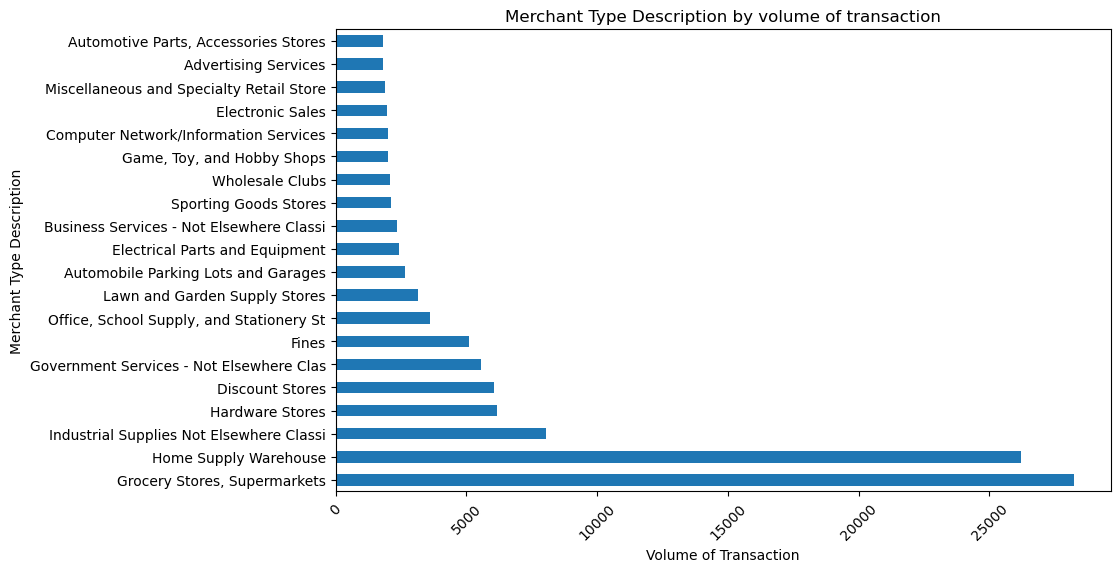

In [47]:
# Create a bar plot for the selected categories
plt.figure(figsize=(10, 6))
top_20_merchant_descr.plot(kind='barh')
plt.title('Merchant Type Description by volume of transaction')
plt.xlabel('Volume of Transaction')
plt.ylabel('Merchant Type Description')
plt.xticks(rotation=45)
plt.show()

### Observation 

The data above includes top 20 "Merchant Type Description" along with the corresponding volume of transactions. 

- Merchant Type Description: Represents descriptions of different merchant types or businesses.
- Volume of Transaction: Denotes the volume of transactions associated with each merchant type description.

Key observations from the data:

- The merchant type with the highest volume of transactions is "Grocery Stores, Supermarkets" with a volume of 28,219 transactions.
- Other notable merchant types include "Home Supply Warehouse" with 26,222 transactions, "Industrial Supplies Not Elsewhere Classified" with 8,035 transactions, and "Hardware Stores" with 6,171 transactions.
- Multiple merchant types have transaction volumes ranging from thousands to a few hundreds.
- Each merchant type description corresponds to a specific category of businesses, indicating the distribution of transaction volumes across different business types.


The data provides insights into the transaction volume associated with various merchant types or businesses. It highlights the significance of specific merchant categories and allows for comparison based on transaction volumes.

### Transaction Segmetation by value

In [48]:
# Select the 'Transaction Amt.' column for clustering
X = df2[['Transaction Amt.']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (you can adjust this)
num_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df2['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\Hp 2022\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [49]:
# Display the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

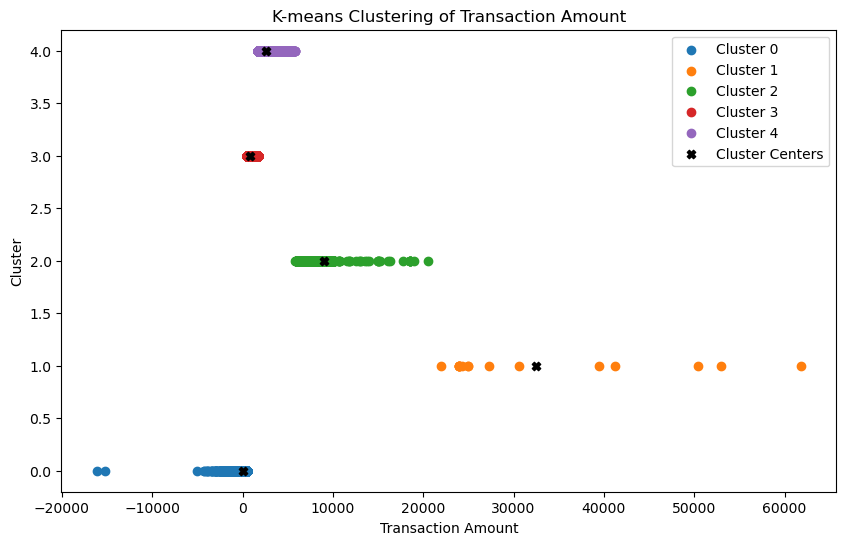

In [50]:
# Plot the clustered data
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    plt.scatter(df2[df2['Cluster'] == cluster]['Transaction Amt.'], 
                [cluster] * len(df2[df2['Cluster'] == cluster]), 
                label=f'Cluster {cluster}')
plt.scatter(cluster_centers, range(num_clusters), marker='X', color='black', label='Cluster Centers')
plt.xlabel('Transaction Amount')
plt.ylabel('Cluster')
plt.title('K-means Clustering of Transaction Amount')
plt.legend()
plt.show()

In [51]:
# Display the clustered data with assigned clusters
df_seg = df2[['Division', 'Transaction Amt.', 'Cluster']]

df_seg

,Division,Transaction Amt.,Cluster
0,PUBLIC HEALTH,50.00,0
1,PUBLIC HEALTH,423.75,0
2,PUBLIC HEALTH,2601.00,4
3,PUBLIC HEALTH,480.66,3
5,ECONOMIC DEVELOPMENT & CULTURE,38.31,0
...,...,...,...
220529,FIRE SERVICES,55.80,0
220530,FIRE SERVICES,53.00,0
220531,FIRE SERVICES,62.50,0
220532,FIRE SERVICES,54.50,0


In [52]:
# Calculate the sum of transaction amounts for each cluster
cluster_sums = df2.groupby('Cluster')['Transaction Amt.'].sum()

# Display the sum of transaction amounts for each cluster
print(cluster_sums)

# Display the clustered data with assigned clusters and sum
#clustered_data = df2.groupby(['Cluster', 'Division'])['Transaction Amt.'].sum().reset_index()
#clustered_data

Cluster
0    15225076.46
1      520226.39
2     5458518.59
3    16828773.98
4     9661976.84
Name: Transaction Amt., dtype: float64


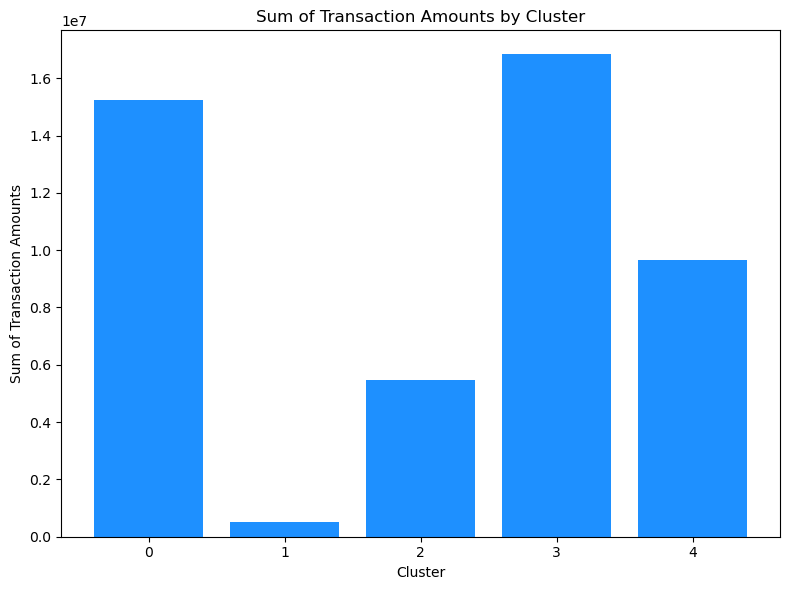

In [53]:
# Cluster sums of transaction amounts
cluster_sums = {
    0: 15225076.46,
    1: 520226.39,
    2: 5458518.59,
    3: 16828773.98,
    4: 9661976.84
}

# Extract keys and values
clusters = list(cluster_sums.keys())
sums = list(cluster_sums.values())

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(clusters, sums, color='dodgerblue')
plt.xlabel('Cluster')
plt.ylabel('Sum of Transaction Amounts')
plt.title('Sum of Transaction Amounts by Cluster')
plt.xticks(clusters)
plt.tight_layout()

# Show the plot
plt.show()

#### Observation:

- Cluster 0 has a sum of transaction amounts around 15,225,076.46 CAD.
- Cluster 1 has a significantly lower sum of transaction amounts around 520,226.39 CAD.
- Cluster 2 has a sum of transaction amounts around 5,458,518.59 CAD.
- Cluster 3 has the highest sum of transaction amounts around 16,828,773.98 CAD.
- Cluster 4 has a sum of transaction amounts around 9,661,976.84 CAD.

Summary:

The data has been clustered into five groups based on the sum of transaction amounts. Cluster 3 has the highest total transaction amount, while Cluster 1 has the lowest. Clusters 0, 2, and 4 fall in between, with varying transaction amounts.

### Time Series Analysis Transaction Amounts

In [54]:
df.head()

,Division,Batch-Transaction-ID,Transaction Date,Card Posting Dt,Merchant Name,Transaction Amt.,Trx Currency,Original Amount,Original Currency,G/L Account,G/L Account Description,Cost Centre /WBS Element / Order,Cost Centre /WBS Element / Order Description,Merchant Type,Merchant Type Description,Purpose
0,PUBLICHEALTH,4608-1,2017-06-15,2017-06-16,PAYPAL *OBC2012,50.00,CAD,50.00,CAD,4760,MEMBERSHIP FEES,PH3071,MATERNAL INFANT HEALTH PROGRAM SUPPORT,8641.0,"Associations - Civic, Social, and Frater",MEMBERSHIP FEE
1,PUBLICHEALTH,4617-1,2017-06-21,2017-06-23,CHNC,423.75,CAD,423.75,CAD,4256,CONFERENCES/SEMINARS - REGISTRATION FEES,PH3071,MATERNAL INFANT HEALTH PROGRAM SUPPORT,8641.0,"Associations - Civic, Social, and Frater",CHNC CONFERENCE
2,PUBLICHEALTH,4621-1,2017-06-26,2017-06-27,POST MD-CPD-UOFT,2601.00,CAD,2601.00,CAD,4256,CONFERENCES/SEMINARS - REGISTRATION FEES,PH3071,MATERNAL INFANT HEALTH PROGRAM SUPPORT,8220.0,"Colleges, Universities, Professional Sch",UOFT CONFERENCE
3,PUBLICHEALTH,4626-1,2017-06-28,2017-06-29,EVENTBRITE/PERINATALMO,480.66,CAD,480.66,CAD,4256,CONFERENCES/SEMINARS - REGISTRATION FEES,PH3071,MATERNAL INFANT HEALTH PROGRAM SUPPORT,7922.0,Theatrical Producers (except Motion Pict,REGISTRATION FEES
5,ECONOMICDEVELOPMENT&CULTURE,4590-1,2017-06-02,2017-06-05,LEE VALLEY - DOWNTOWN,38.31,CAD,38.31,CAD,2600,RECREATIONAL & EDUCATIONAL SUPPLIES,AH0073,HS-MH-EDUCATION/OUTRCH-FORT YORK,5072.0,Hardware Equipment and Supplies,LEMON RASPS


In [55]:
# Convert the timestamp column to datetime format
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

In [56]:
# Set the timestamp column as the index
df.set_index('Transaction Date', inplace=True)

In [57]:
# Resample the data to a specific frequency (e.g., monthly)
resampled_data = df['Transaction Amt.'].resample('M').sum()

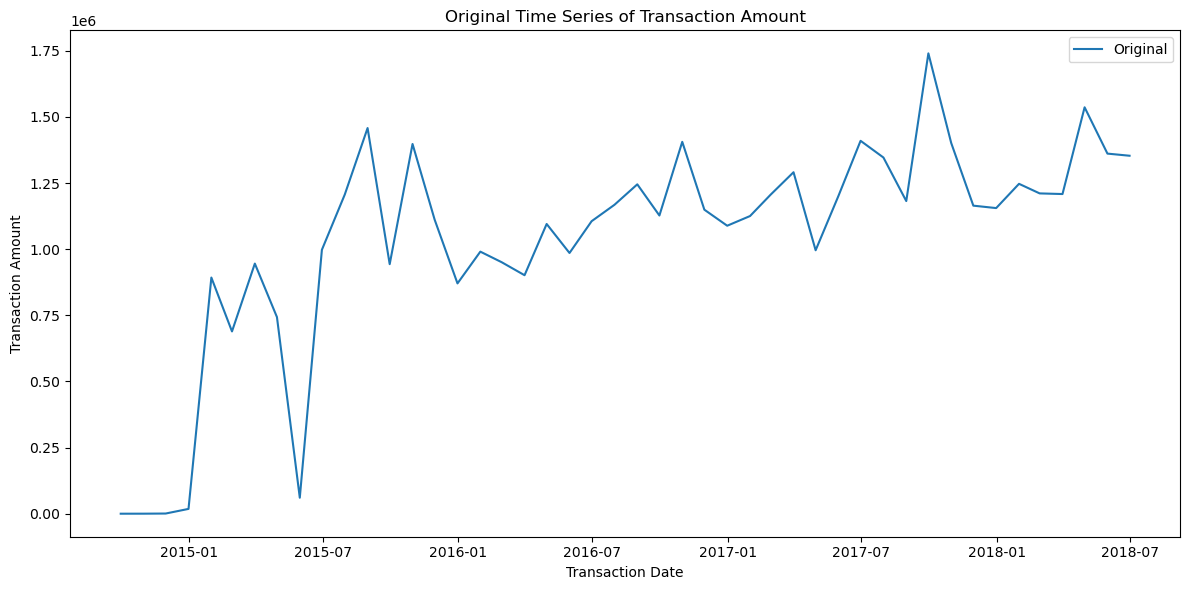

In [58]:
# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(resampled_data.index, resampled_data.values, label='Original')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.title('Original Time Series of Transaction Amount')
plt.legend()
plt.tight_layout()
plt.show()

In [59]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(resampled_data, model='additive')

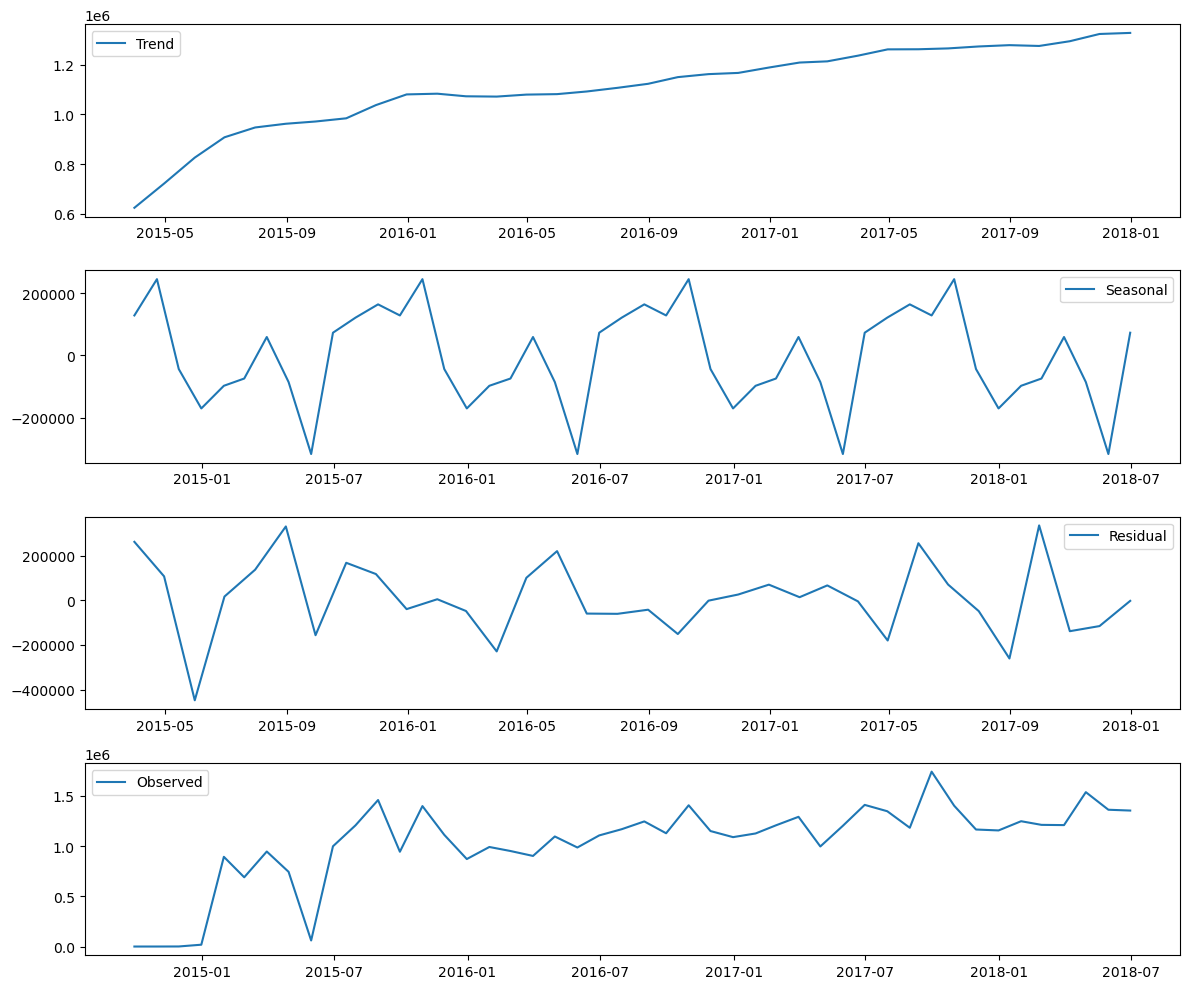

In [60]:
# Plot the decomposition components
plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition.trend.index, decomposition.trend.values, label='Trend')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.seasonal.index, decomposition.seasonal.values, label='Seasonal')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.resid.index, decomposition.resid.values, label='Residual')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.observed.index, decomposition.observed.values, label='Observed')
plt.legend()
plt.tight_layout()
plt.show()

In [61]:
# Get the seasonal component and corresponding dates
seasonal_component = decomposition.seasonal

# Create a DataFrame with seasonal dates and corresponding amounts
seasonal_df = pd.DataFrame({'Seasonal Date': seasonal_component.index, 'Seasonal Amount': seasonal_component.values})

# Display the table
display(HTML(seasonal_df.to_html(index=False)))

Seasonal Date,Seasonal Amount
2014-09-30,128255.901898
2014-10-31,244870.008981
2014-11-30,-43975.049352
2014-12-31,-170612.188380
2015-01-31,-97801.156157
2015-02-28,-74496.895741
2015-03-31,58939.335509
2015-04-30,-85880.889630
2015-05-31,-317136.134352
2015-06-30,72773.315926


#### Observations:

The table above displays the seasonal component of your time series data along with corresponding dates and amounts. The seasonal component represents the repeating patterns that occur at regular intervals in your data. Here's a summary of the key insights from the table:

- The "Seasonal Date" column indicates the specific dates for which the seasonal component has been calculated.
- The "Seasonal Amount" column represents the magnitude of the seasonal pattern at each corresponding date.
- Positive "Seasonal Amount" values indicate that the actual data for those months is higher than the expected seasonal pattern.
- Negative "Seasonal Amount" values indicate that the actual data for those months is lower than the expected seasonal pattern.
- The values in the "Seasonal Amount" column reflect the deviations from the typical seasonal behavior, capturing any irregularities or trends that occur within the time series.


Analyzing the seasonal component helps you understand how your data behaves at specific times of the year and whether it follows expected patterns or deviates from them. This information can be valuable for making informed decisions and predictions based on the recurring patterns in your time series data.